<a href="https://colab.research.google.com/github/Shivam22khanna/Machine_Learning_Work/blob/main/Single_cell_and_Multi_cell_RNA_sequencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Single-Cell RNA Sequencing (scRNA-seq) Analysis (Using Scanpy)**

In [4]:
!pip install python-igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.4 MB/s eta 0:00:00


In [5]:
!pip install scanpy

In [7]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.3 MB/s eta 0:00:00


<ipython-input-8-3a73397baa05>:20: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)  # Leiden clustering algorithm


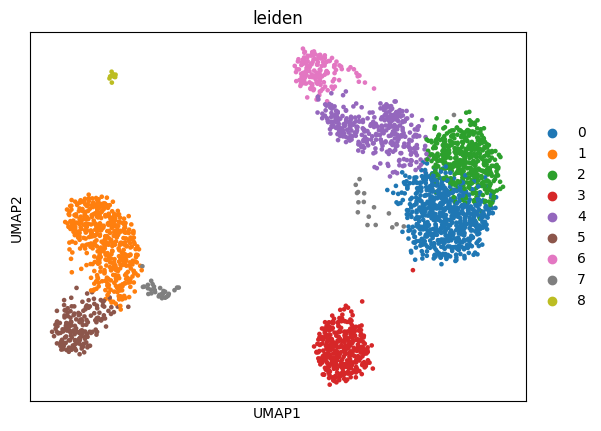

In [8]:
import scanpy as sc
import matplotlib.pyplot as plt

# Load example single-cell dataset (PBMC from 10x Genomics)
adata = sc.datasets.pbmc3k()

# Preprocessing: Normalization, Log transformation, and Filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# PCA and clustering
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)  # Leiden clustering algorithm

# Visualize UMAP clusters
sc.pl.umap(adata, color=["leiden"])
plt.show()


**Multi-Cell (Bulk) RNA Sequencing Analysis (Using DESeq2-like Method in Python)**

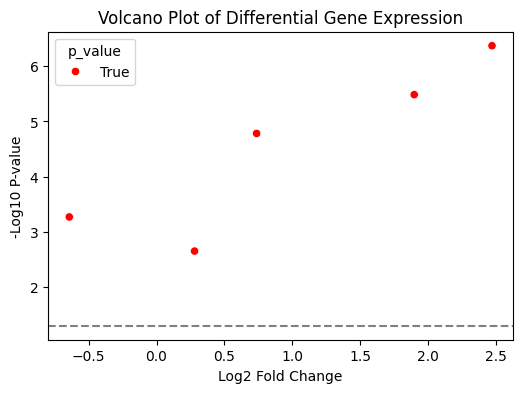

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Simulated bulk RNA-seq count data with replicates
genes = ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE']

# Expression values for Normal and Tumor conditions (3 replicates each)
condition_1 = np.array([[100, 120, 110], [200, 210, 220], [150, 140, 155], [50, 60, 55], [300, 290, 310]])  # Normal
condition_2 = np.array([[400, 410, 420], [250, 260, 255], [100, 90, 95], [300, 310, 305], [500, 490, 510]])  # Tumor

# Compute mean expression for reference
normal_mean = condition_1.mean(axis=1)
tumor_mean = condition_2.mean(axis=1)

# Perform t-test for differential expression
p_values = [ttest_ind(condition_1[i], condition_2[i])[1] for i in range(len(genes))]
log2FC = np.log2(tumor_mean / normal_mean)  # Log Fold Change

# Create DataFrame
df = pd.DataFrame({'Gene': genes, 'log2FC': log2FC, 'p_value': p_values})

# Volcano plot visualization
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['log2FC'], y=-np.log10(df['p_value']), hue=df['p_value'] < 0.05, palette={True: 'red', False: 'blue'})
plt.axhline(-np.log10(0.05), linestyle='dashed', color='gray')  # Significance threshold
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.title("Volcano Plot of Differential Gene Expression")
plt.show()


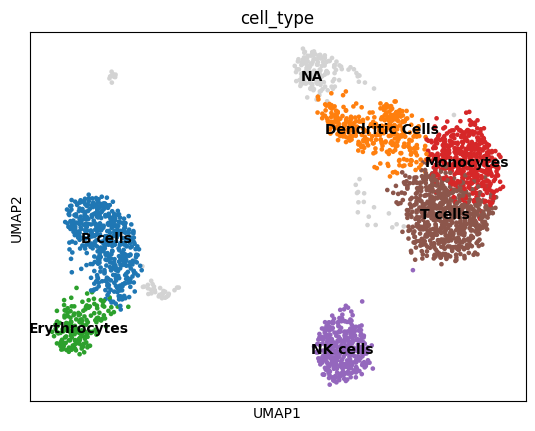

In [15]:
import scanpy as sc
import matplotlib.pyplot as plt

# Load example single-cell dataset (PBMC from 10x Genomics)
adata = sc.datasets.pbmc3k()

# Preprocessing: Normalization, Log transformation, and Filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# PCA and clustering
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)  # Leiden clustering algorithm

# Identify marker genes for each cluster
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon")

# Map Leiden clusters to known PBMC cell types (Manual Mapping)
cell_type_mapping = {
    "0": "T cells",
    "1": "B cells",
    "2": "Monocytes",
    "3": "NK cells",
    "4": "Dendritic Cells",
    "5": "Erythrocytes"
}

# Assign cell type labels based on Leiden clusters
adata.obs["cell_type"] = adata.obs["leiden"].map(cell_type_mapping)

# Visualize UMAP with Cell Type Annotations
sc.pl.umap(adata, color="cell_type", legend_loc="on data")
plt.show()


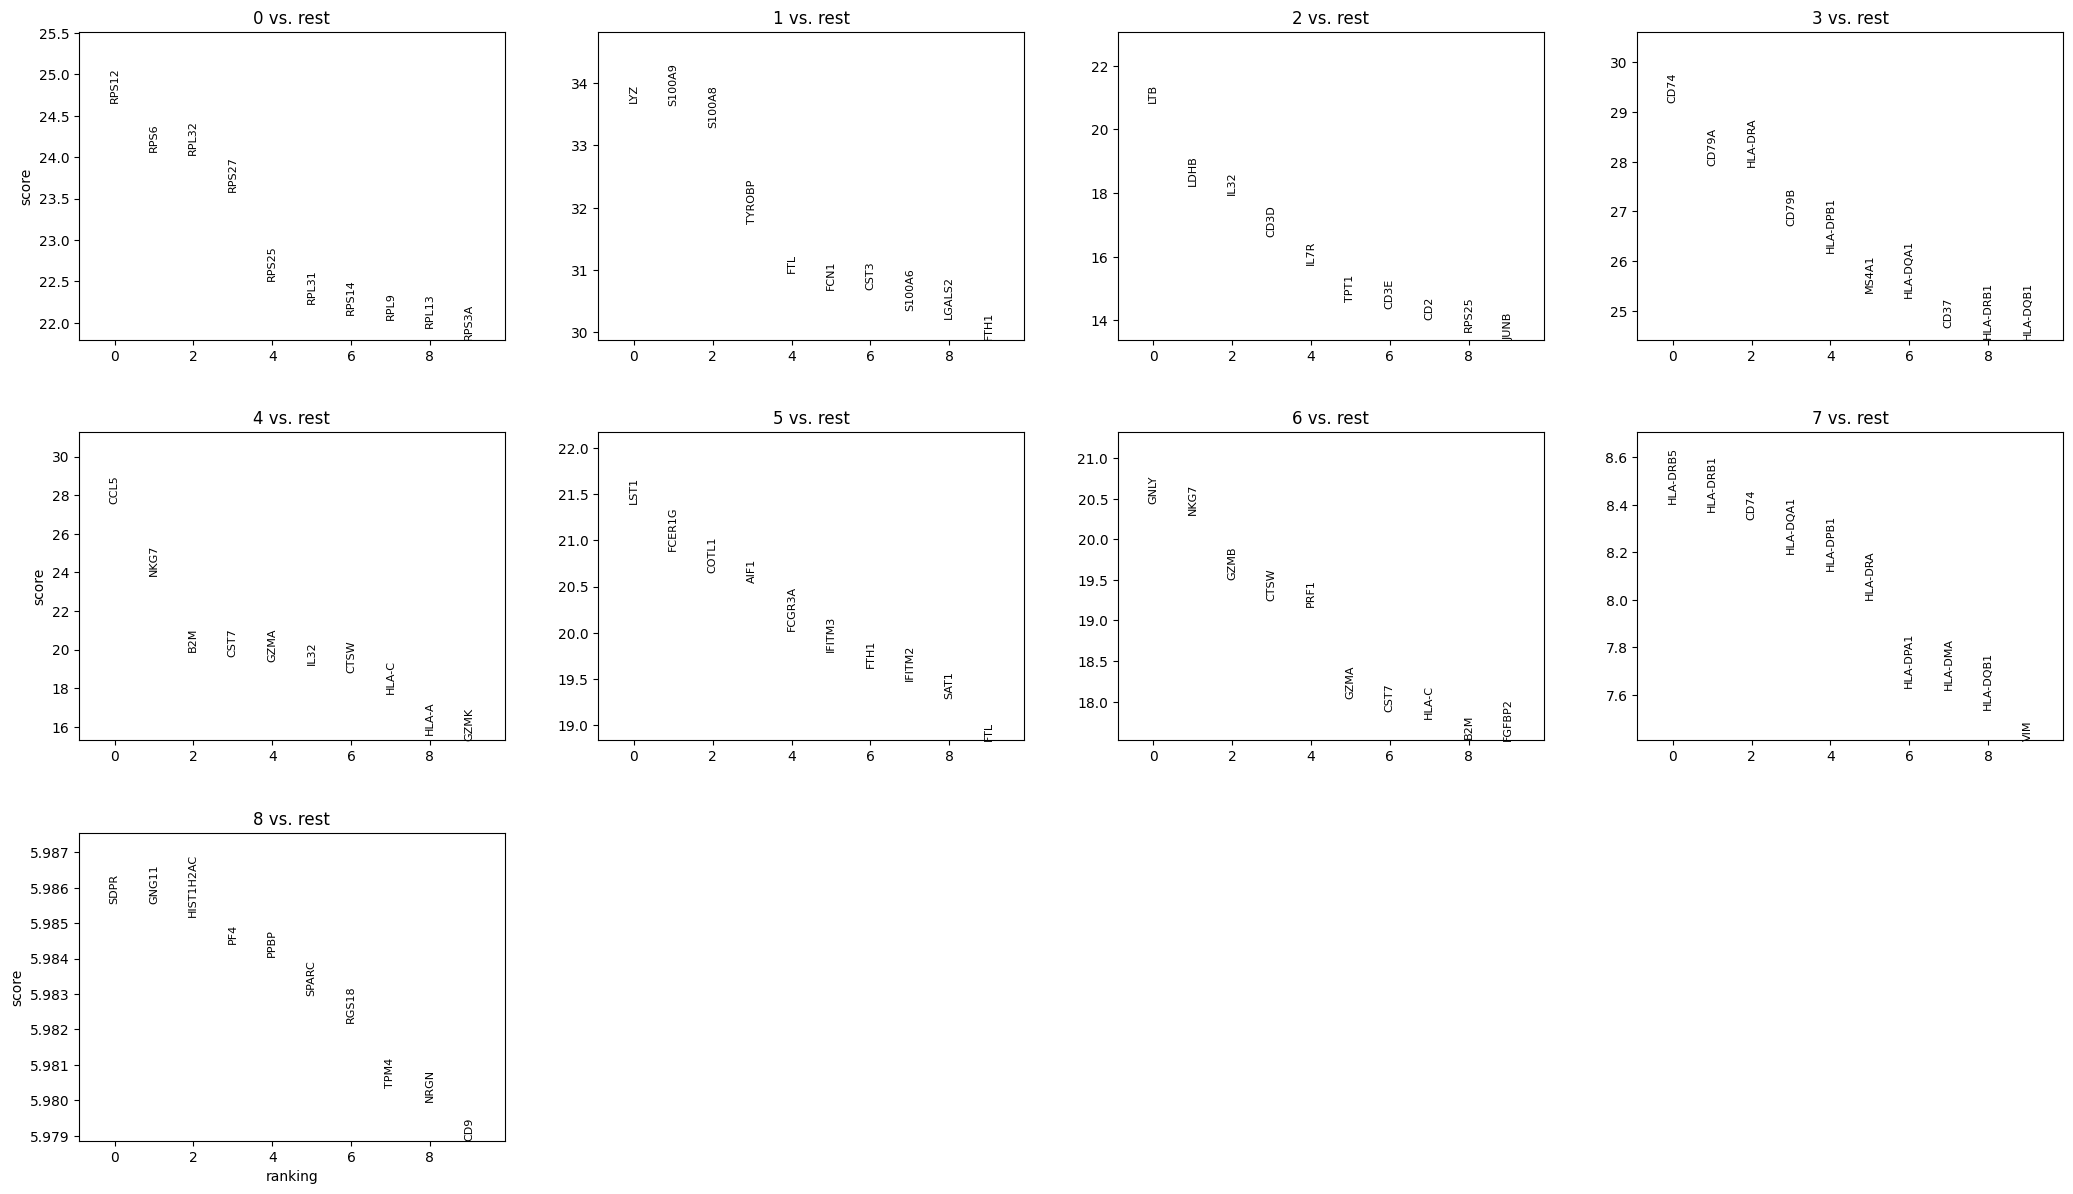

In [16]:
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)
